In [1]:
from tqdm import tqdm
q=0
for i in tqdm(range(10000000)):
    q=i+1

100%|██████████| 10000000/10000000 [00:03<00:00, 3205841.21it/s]


In [4]:
import pandas as pd,  numpy as np

In [7]:
def crear_cluster(N,k): #n elementos (personas) para k clusters
    np.random.seed(1234) #fijar semilla
    puntos_por_cluster=float(N)/k
    X=[]
    y=[]
    for i in range (k):
        centroide_ingreso=np.random.uniform(5000.0,100000.0) #posibles ingresos en pesos
        centroide_edad=np.random.uniform(18.0,65.0) #posibles edades
        for j in range(int(puntos_por_cluster)):
            X.append([np.random.normal(centroide_ingreso,2500.0),np.random.normal(centroide_edad,1.80)])
            y.append(i)
                     
    X=np.array(X)
    y=np.array(y)
    return X,y

                     

C:\Users\kevin\AppData\Local\Temp\ipykernel_22600\394147750.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))


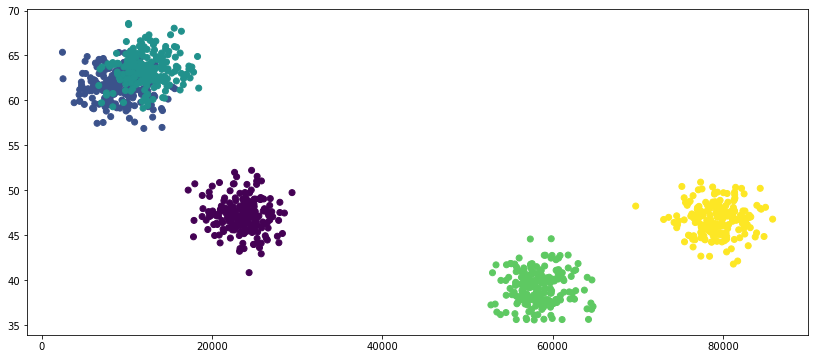

C:\Users\kevin\AppData\Local\Temp\ipykernel_22600\394147750.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0],X[:,1], c=y.astype(np.float))


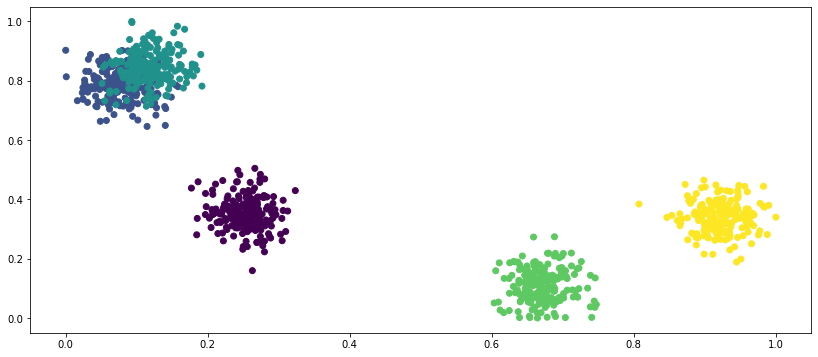

In [8]:
#crear 3 clusters para los elementos generados aleatoriamente.
#cluster para datos sin normalizar
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler
(X,y)=crear_cluster(1000,5)
plt.figure(figsize=(14,6))
plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))
plt.show()

#datos escalados
escala=MinMaxScaler(feature_range=(0,1)).fit(X) #notar que la escala puede variar
X=escala.transform(X)

plt.figure(figsize=(14,6))
plt.scatter(X[:,0],X[:,1], c=y.astype(np.float))
plt.show()

Usar máquina de vectores de soporte para crear clusters

In [9]:
from sklearn import svm, datasets
C=1.0
svc=svm.SVC(kernel="linear", C=C).fit(X,y)

C:\Users\kevin\AppData\Local\Temp\ipykernel_22600\176899819.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))


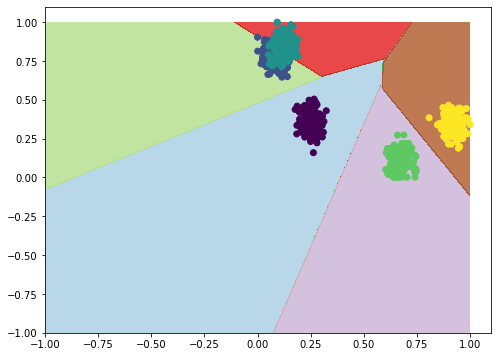

In [10]:
#los clusters son lineales, por lo que las divisiones serán rectas 
def predicciones(clf):
    xx,yy=np.meshgrid(np.arange(-1,1,.001),
                     np.arange(-1,1,.001))
    npx=xx.ravel()
    npy=yy.ravel()
    
    muestreo=np.c_[npx,npy]
    Z=clf.predict(muestreo)
    
    plt.figure(figsize=(8,6))
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z, cmap=plt.cm.Paired, alpha=.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
    
predicciones(svc)
    

Haciendo predicciones:

In [27]:
#Una persona con ingresos de 95000 a los 50 años se localizará en el cluster 4 (amarillo)
print(svc.predict(escala.transform([[95000.0,50.0]])))


[4]
